# Intro

This project conducts a thorough analysis of paleo-present climate data, focusing on the intricate relationship between CO2 levels and temperature anomalies over the past 800,000 years. In addition to this core analysis, the study explores CH4 concentrations and will aim to explore climate change signals in the Irish context.

Data from various sources will be consolidated into a pandas dataframe and exported in CSV and JSON formats for accessibility. The project will then analyze trends, temporal relationships, and leads/lags for variables. Furthermore, it will try to predicts future global temperature anomalies.


### Set up

We will first import the libraries we will use :

In [1]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb
import numpy as np
import warnings

Next, let's import the historical datasets with data from the past 800000 years.

In [2]:
historical_co2 = pd.read_csv('source_data/historical_co2.csv')

historical_co2 = historical_co2.rename(columns={
    'EDC3_gas_a (yr)': 'historical_EDC3_gas_year',
    'CO2 (ppmv)': 'historical_co2_ppmv',
    'source': 'historical_study_source'
})


In [3]:
historical_temperature = pd.read_csv('source_data/historical_temperature.csv')

historical_temperature = historical_temperature.rename(columns={
    'temp': 'historical_temp_kelvin',
    'AICC2012': 'historical_temp_year'
})

## Co2 vs Temperature Anomoly

We will check the Co2 levels historically for the past 800000 years to 1950 :

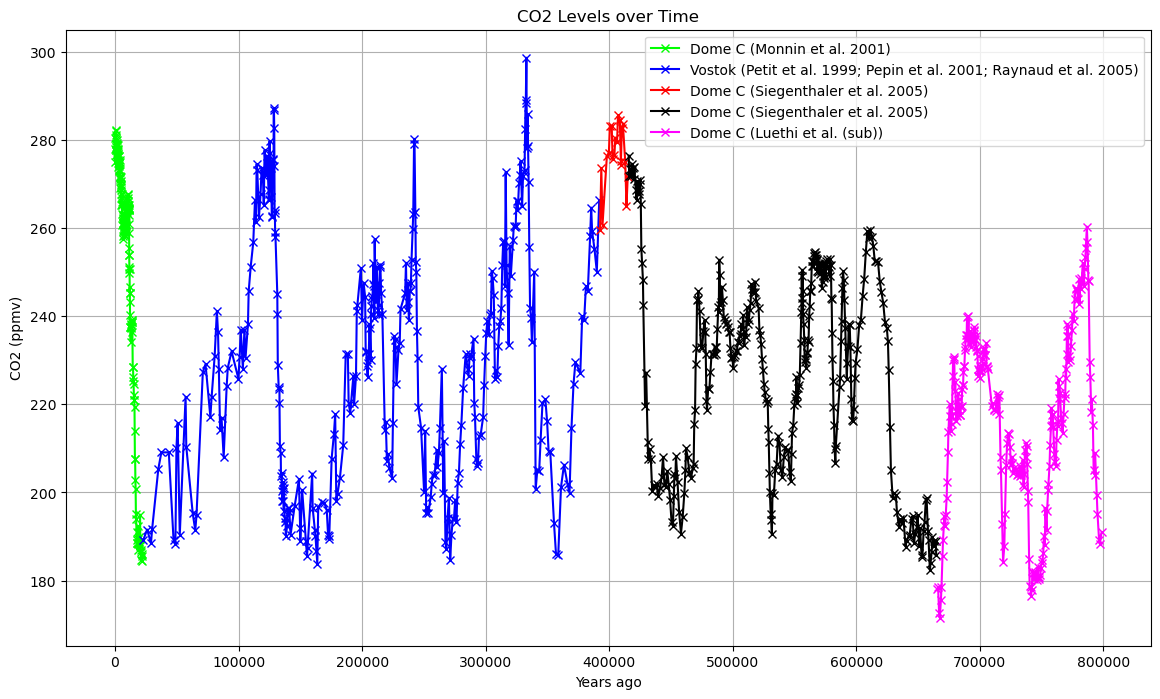

In [4]:
# create colour map for graph
colours = {
    'Dome C (Monnin et al. 2001) measured at University of Bern': 'lime',
    'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble': 'blue',
    'Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble': 'red',
    'Dome C (Siegenthaler et al. 2005)  measured at University of Bern': 'black',
    'Dome C (Luethi et al. (sub)) measured at University of Bern': 'fuchsia'
}

mplot.figure(figsize=(14, 8))
# loop through the data and find each sourcec for plotting with colour
for source, colour in colours.items():
    subset = historical_co2[historical_co2['historical_study_source'] == source]
    mplot.plot(subset['historical_EDC3_gas_year'], subset['historical_co2_ppmv'], marker='x', color=colour, label=source)

mplot.xlabel('Years ago')
mplot.ylabel('CO2 (ppmv)')
mplot.title('CO2 Levels over Time')
mplot.grid(True)

# Add legend with short versions of the source names for easy readability
legend_labels = {source: source.split(' measured')[0] for source in colours.keys()}
mplot.legend(labels=legend_labels.values(), loc='upper right')

mplot.show()

We can see a pattern emerge of lows and highs. Next, we will see the temperature over the same time period :

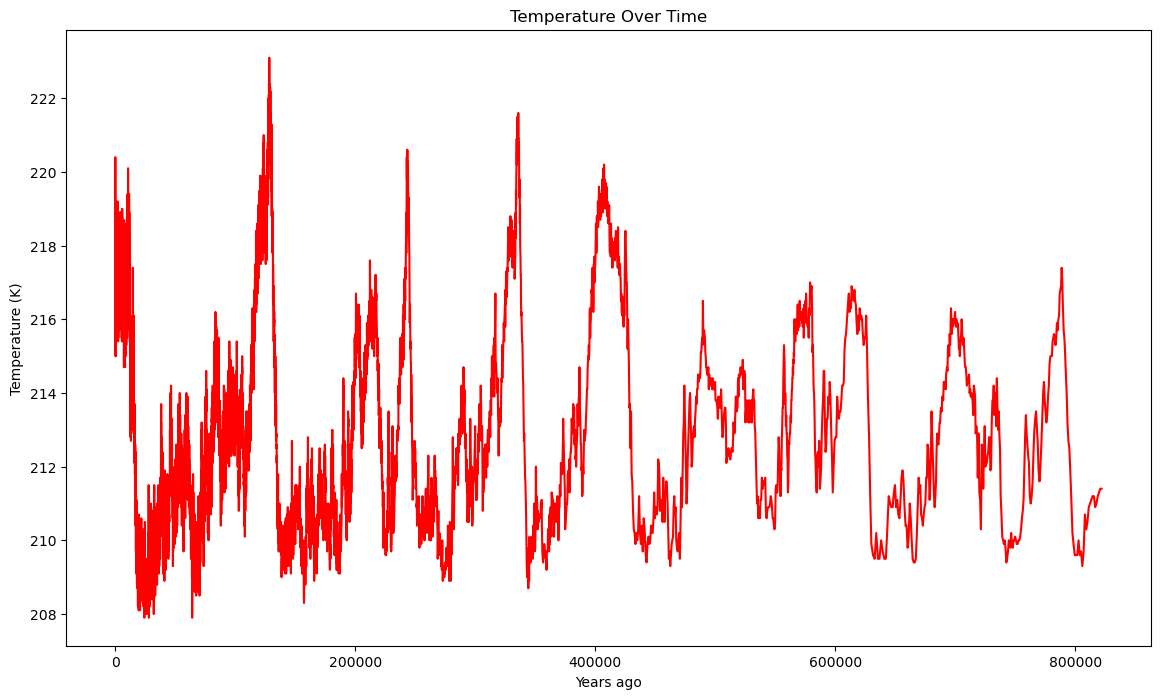

In [5]:
mplot.figure(figsize=(14, 8))

mplot.plot(historical_temperature['historical_temp_year'], historical_temperature['historical_temp_kelvin'], color='red')
mplot.xlabel('Years ago')
mplot.ylabel('Temperature (K)')
mplot.title('Temperature Over Time')
mplot.show()

It appears to follow the a similar pattern of lows and highs in intervals. Let's plot them together and see how they line up.

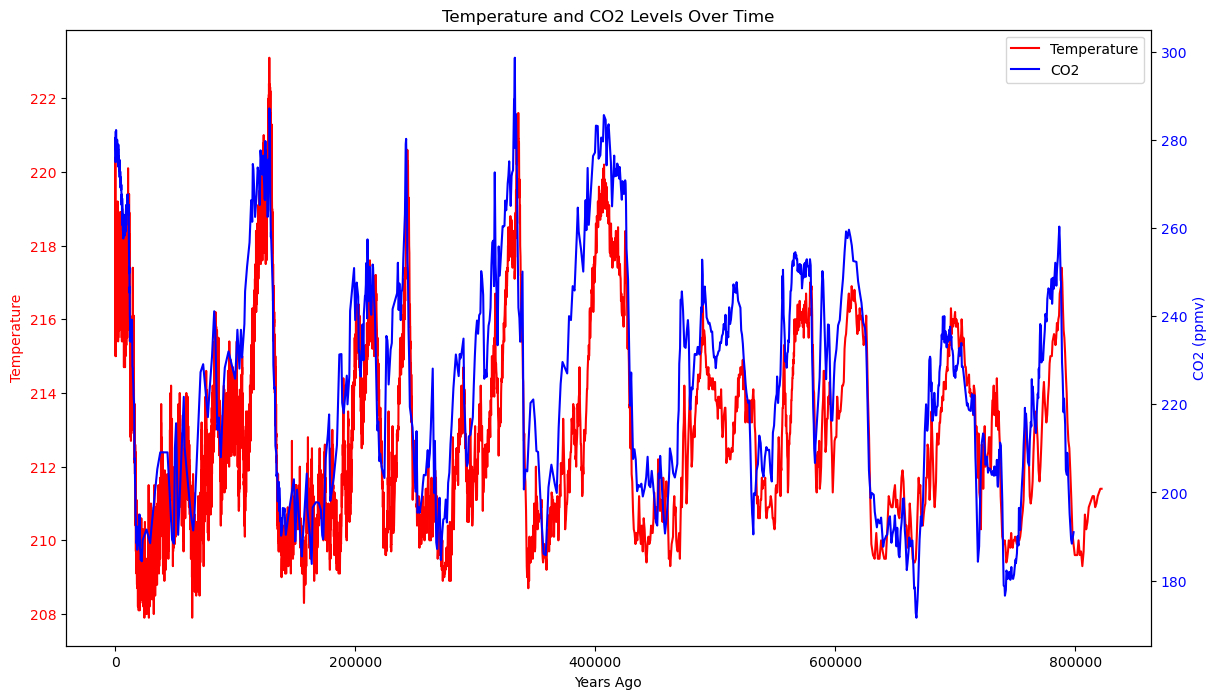

In [6]:
# Create a figure and axis with a twin y-axis
fig, ax1 = mplot.subplots(figsize=(14, 8))

# temperature data on first y-axis
color = 'red'
ax1.plot(historical_temperature['historical_temp_year'], historical_temperature['historical_temp_kelvin'], color=color, label='Temperature')

# labels and title for first y-axis
ax1.set_xlabel('Years Ago')
ax1.set_ylabel('Temperature', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Temperature and CO2 Levels Over Time')

# create second y-axis to plot CO2 data
ax2 = ax1.twinx()

# CO2 data on the second y-axis
color = 'blue'
ax2.plot(historical_co2['historical_EDC3_gas_year'], historical_co2['historical_co2_ppmv'], color=color, label='CO2')

# labels for the second y-axis
ax2.set_ylabel('CO2 (ppmv)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# combine both legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

mplot.show()

There is a strong correlation of high Co2 being linked to high temeprature and vice versa. 

We will now look at more recent data where we see the anomoly. Below is the temperature :

In [7]:
modern_temp = pd.read_csv('source_data/modern_temp.csv')

modern_temp = modern_temp.rename(columns={
    'Source': 'modern_tempature_source',
    'Year': 'modern_temperature_year',
    'Mean': 'modern_mean_temperature'
})

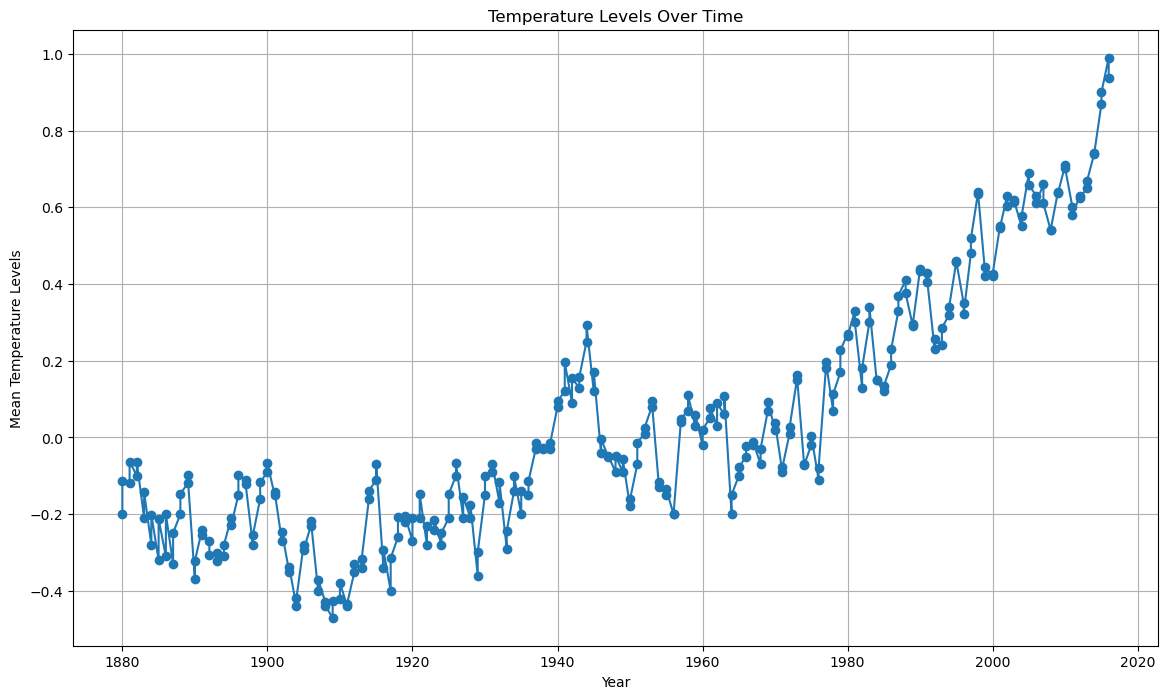

In [8]:
mplot.figure(figsize=(14, 8))
mplot.plot(modern_temp['modern_temperature_year'], modern_temp['modern_mean_temperature'], marker='o', linestyle='-') 
mplot.xlabel('Year')
mplot.ylabel('Mean Temperature Levels')
mplot.title('Temperature Levels Over Time')
mplot.grid(True)
mplot.show()

It's increases more rapidly over the past 50 years. Below is a similar time frame for CO2.

Source: https://datahub.io/core/co2-ppm 

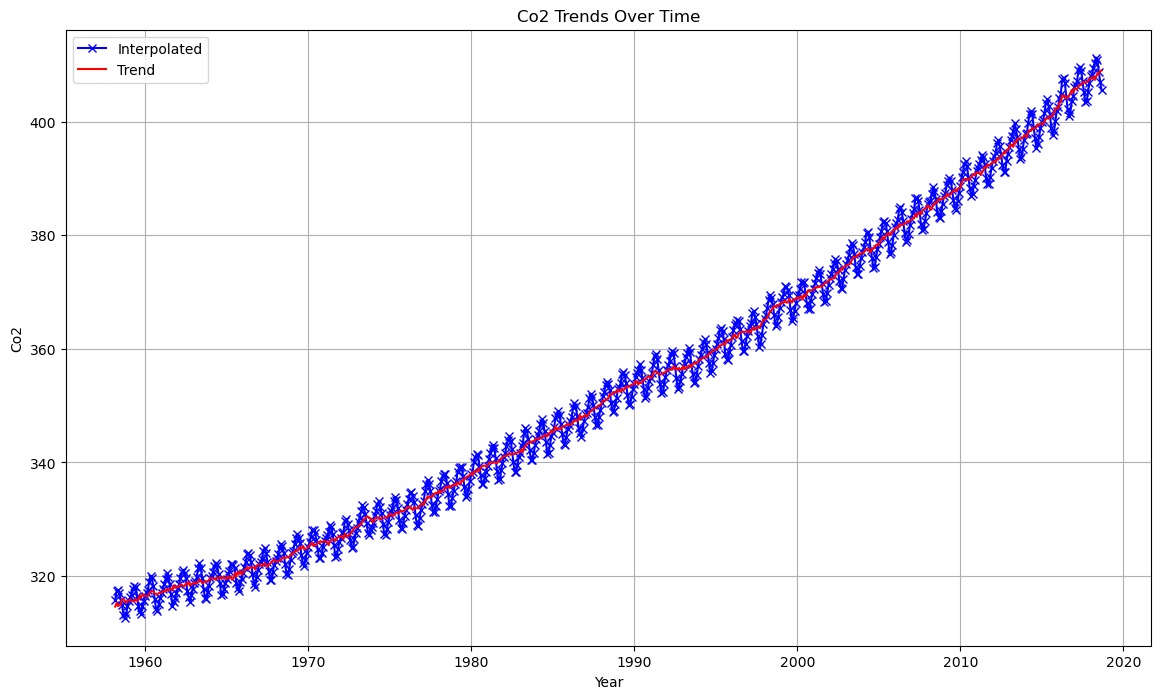

In [9]:
modern_co2 = pd.read_csv('source_data/modern_co2.csv')

modern_co2 = modern_co2.rename(columns={
    'Date': 'modern_co2_Date',
    'Decimal Date': 'modern_co2_Decimal_Date',
    'Average': 'modern_co2_Average',
    'Interpolated': 'modern_co2_Interpolated',
    'Trend': 'modern_co2_Trend',
    'Number of Days': 'modern_co2_Number_of_Days'
})

modern_co2['modern_co2_Date'] = pd.to_datetime(modern_co2['modern_co2_Date'])

mplot.figure(figsize=(14, 8))

# plot interpolated
mplot.plot(modern_co2['modern_co2_Date'], modern_co2['modern_co2_Interpolated'], marker='x', linestyle='-', label='Interpolated', color='blue')
# plot trend
mplot.plot(modern_co2['modern_co2_Date'], modern_co2['modern_co2_Trend'], linestyle='-', label='Trend', color='red')

mplot.xlabel('Year')
mplot.ylabel('Co2')
mplot.title('Co2 Trends Over Time')
mplot.legend()
mplot.grid(True)
mplot.show()

We can see a similar pattern here of rapid incrementing as we approach present day.

# CH4 - Methane

The relationship between CH4 (methane) and temperature is a key aspect of climate science. Methane is a potent greenhouse gas, meaning it has the ability to trap heat in the Earth's atmosphere. When temperatures rise, such as due to human activities like burning fossil fuels and deforestation, it can lead to increased levels of methane being released into the atmosphere.

This is concerning because methane has a much higher warming potential compared to carbon dioxide over a relatively short time frame. The release of methane can occur from various sources, including wetlands, livestock, and the extraction and use of fossil fuels. As temperatures increase, feedback loops may also be triggered, causing more methane to be released, which further contributes to global warming.

Efforts to mitigate climate change often involve addressing methane emissions alongside other greenhouse gases. This can include better waste management, reducing reliance on fossil fuels, and sustainable agricultural practices to manage livestock-related emissions.

data source = https://gml.noaa.gov/ccgg/trends_ch4/

In [10]:
ch4 = pd.read_csv('source_data/ch4_data.csv')

ch4 = ch4.rename(columns={
    'year': 'ch4_year',
    'month': 'ch4_month',
    'decimal': 'ch4_decimal_date',
    'average': 'ch4_average',
    'average_unc': 'ch4_average_unc',
    'trend': 'ch4_trend',
    'trend_unc': 'ch4_trend_unc'
})

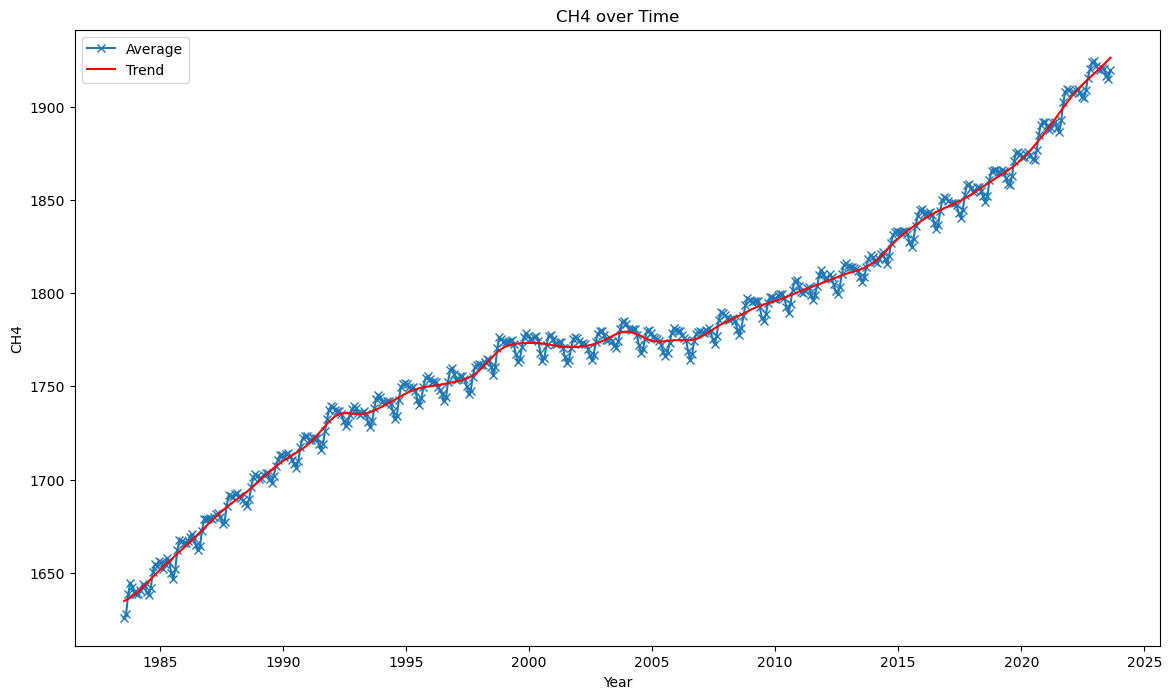

In [11]:
mplot.figure(figsize=(14, 8))

# plot average CH4
mplot.plot(ch4['ch4_decimal_date'], ch4['ch4_average'], label='Average', marker='x')
# plot trend
mplot.plot(ch4['ch4_decimal_date'], ch4['ch4_trend'], label='Trend', color ='red')

mplot.xlabel('Year ')
mplot.ylabel('CH4')
mplot.title('CH4 over Time')
mplot.legend()

mplot.show()

We can see methane is reaching new highs which in turn results in trapping more heat in the atmosphere. This causes temperatures to rise which we have previously seen is happening in present day.

# Irish Weather Context

Let's take a look at the climate in irish context. We'll first look at temperatures historically. Please note the temperture datasets only range from approx 1840 to 1960 from Met.ie.

First step is to import the data. We have data for a variety of Irish locations.

In [12]:
# irish data: https://www.met.ie/climate/available-data/long-term-data-sets/
birr_weather = pd.read_csv('source_data/Birr-Castle-second-order-station_1872-1911.csv')
belmullet_weather = pd.read_csv('source_data/Blacksod-Point_Belmullet_1872-1920.csv')
botanic_weather = pd.read_csv('source_data/Botanic-Gardens-Dublin-NLI-series_1882-1952.csv')
galway_weather = pd.read_csv('source_data/NUI-Galway_1851-1965.csv')
pheonix_park_weather = pd.read_csv('source_data/Phoenix-Park-Dublin_1831-1958.csv')

Let's plot the average temperature for these regions per year. We will create a function for this as we will want to run it for each dataset.

In [13]:
# Create a reusable function to plot average Irish temperature data
def plot_average_temperatures(df, location_name, color):
    # Calculate average temperature by taking the mean of Min and Max temperatures
    df['Average (C)'] = (df['Min (C)'] + df['Max (C)']) / 2
    
    # group data by year and calculate the mean of the average temperatures
    avg_per_year = df.groupby('Year')['Average (C)'].mean()

    # Create a new DataFrame with the average temperatures per year
    df_avg_per_year = pd.DataFrame({'Year': avg_per_year.index, 'Average (C)': avg_per_year.values})

    # Plot the average temperatures by years
    mplot.plot(df_avg_per_year['Year'], df_avg_per_year['Average (C)'], label=f'{location_name}', marker='o', color=color)


Now to plot the data for each region :

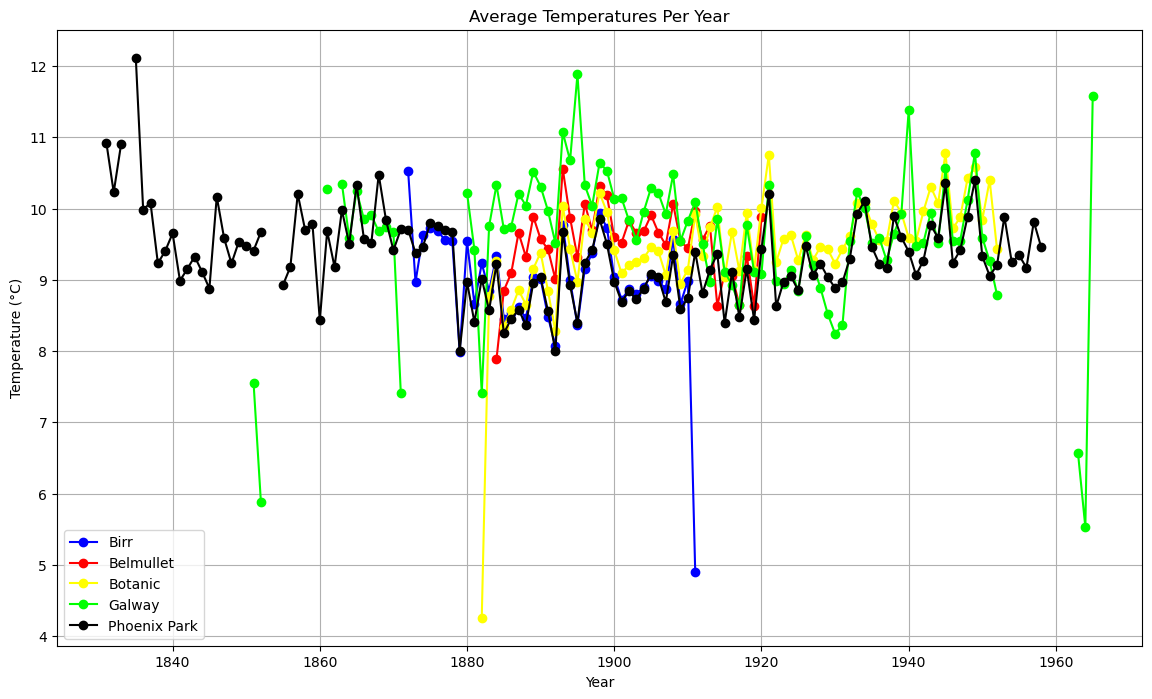

In [14]:
mplot.figure(figsize=(14, 8))

plot_average_temperatures(birr_weather, 'Birr', 'blue')
plot_average_temperatures(belmullet_weather, 'Belmullet', 'red')
plot_average_temperatures(botanic_weather, 'Botanic', 'yellow')
plot_average_temperatures(galway_weather, 'Galway', 'lime')
plot_average_temperatures(pheonix_park_weather, 'Phoenix Park', 'black')

mplot.legend()

mplot.title('Average Temperatures Per Year')
mplot.xlabel('Year')
mplot.ylabel('Temperature (°C)')
mplot.grid(True)
mplot.show()

There are some outliers here over the decades. This could be due to missing data or incorrectly calculated data for such old dates. We will ignore these outliers. 

For the most part, it seems like the fluctuations in temperature follow similar patterns. Particularly, the best view is between 1890 and 1920, we can clearly see each regions temperature rise and falls while following the same pattern.

The temperature seems to remain relatively stable during this entire time period.

Now, we will examine rainfall in Ireland to determine what effects climate change may be having in Ireland.

Let's import the data. 

In [15]:
rainfall = pd.read_csv('source_data/irish_rainfall.CSV')

rainfall = rainfall.rename(columns={
    'Year': 'irish_rainfall_year',
    'Month': 'irish_rainfall_month',
    'Median_monthly_series': 'median_monthly_rainfall'
})

Let's plot the rainfall over the years. 

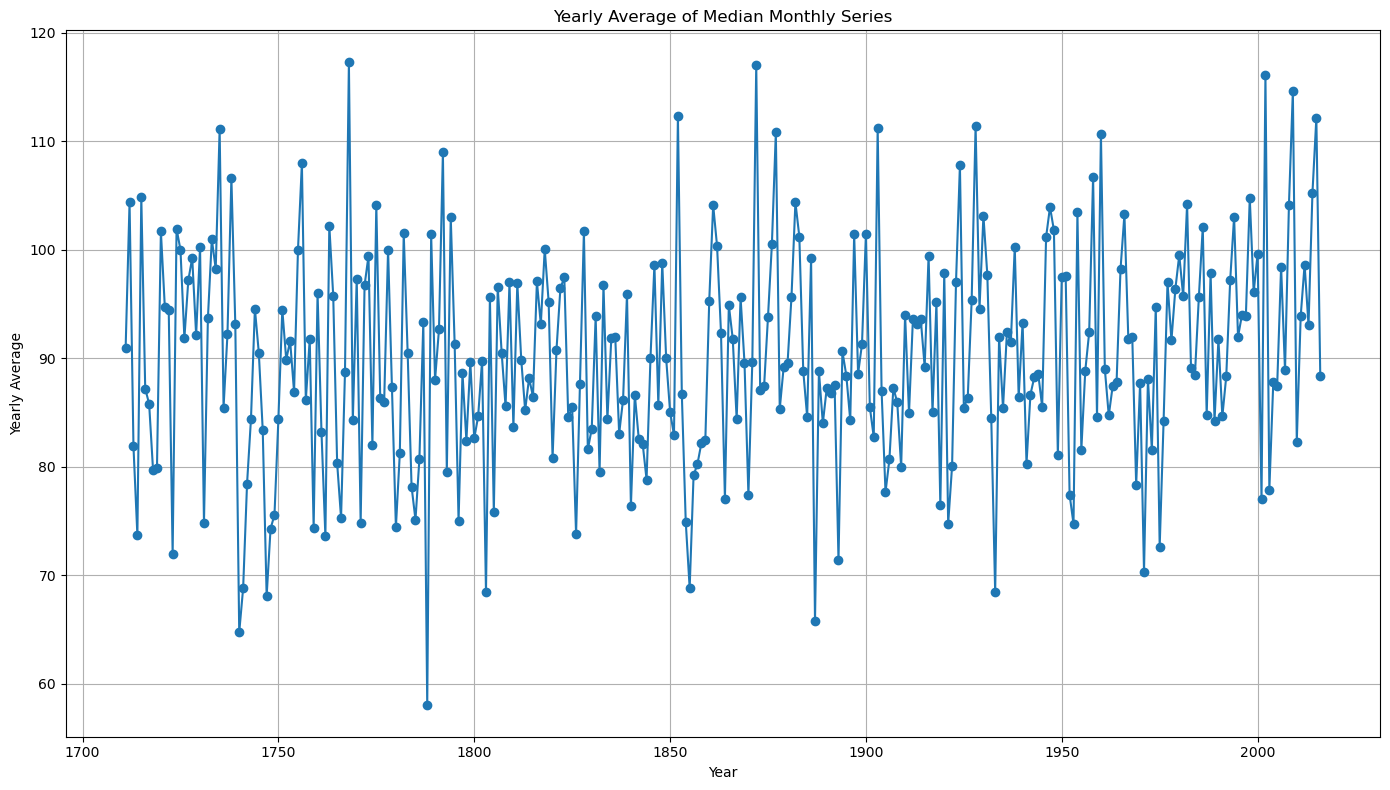

In [16]:
# Convert Month and Year to datetime
rainfall['irish_rainfall_date'] = pd.to_datetime(rainfall.assign(
    year=rainfall['irish_rainfall_year'],
    month=rainfall['irish_rainfall_month']
)[['year', 'month']].assign(day=1))

# Group by Year and calculate the average for each Year
yearly_avg = rainfall.groupby(rainfall['irish_rainfall_date'].dt.year)['median_monthly_rainfall'].mean()

mplot.figure(figsize=(14, 8))
mplot.plot(yearly_avg.index, yearly_avg, marker='o')
mplot.title('Yearly Average of Median Monthly Series')
mplot.xlabel('Year')
mplot.ylabel('Yearly Average')
mplot.grid(True)
mplot.tight_layout()
mplot.show()

From this, it seems there is a wide range of highs and lows in terms of rainfall. However, looking at the right side of the graph, it looks like there max values seems to be higher in general and the min values eems to be quite high aslo.

Let's look closer.

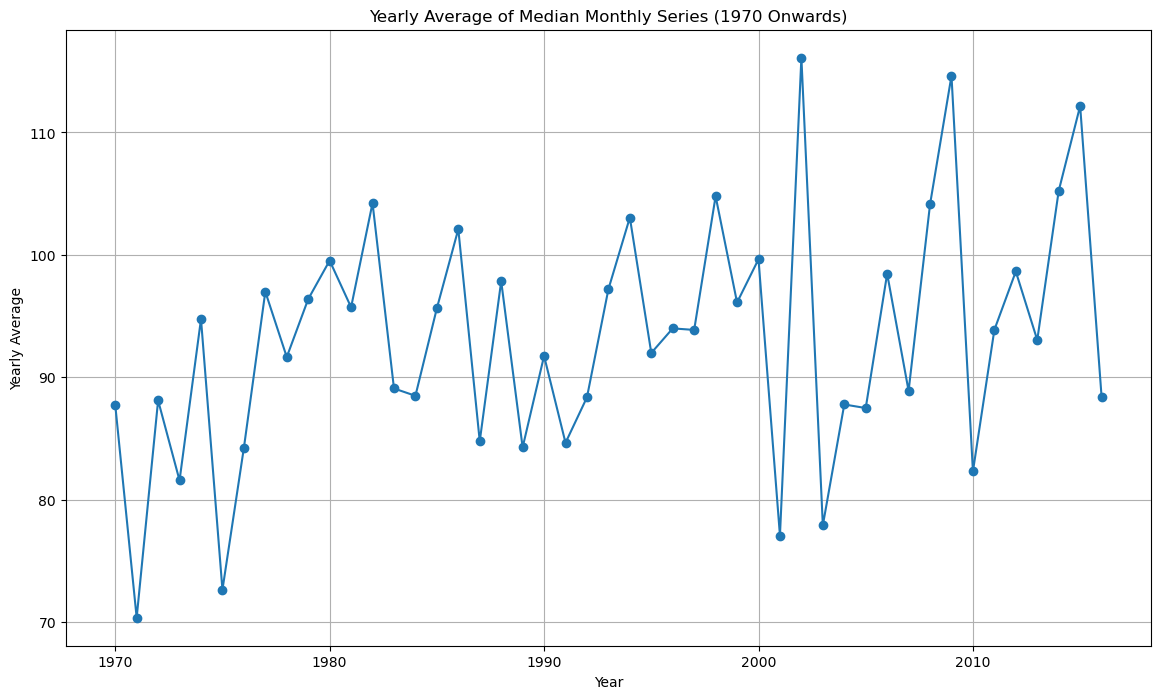

In [17]:

# Filter data for years from 1970 onwards
filtered_years = rainfall[rainfall['irish_rainfall_date'].dt.year >= 1970]

# Group by Year and calculate the average for each Year
yearly_avg = filtered_years.groupby(filtered_years['irish_rainfall_date'].dt.year)['median_monthly_rainfall'].mean()

# Plotting
mplot.figure(figsize=(14, 8))
mplot.plot(yearly_avg.index, yearly_avg, marker='o')
mplot.title('Yearly Average of Median Monthly Series (1970 Onwards)')
mplot.xlabel('Year')
mplot.ylabel('Yearly Average')
mplot.grid(True)
mplot.show()


The closer we look, it is very noticeable that the further we go in years, we are seeing more and more extremes and higher values for max and min rainfall. These dates are in line with what we see with the rising temperature levels, rising CO2 levels and rising methane (ch4) levels. 

# Export Data

Here we will export all the source data into single files. One as a CSV file and the other as a JSON file. 

First we need to combine all the data into a single dataframe :

In [18]:
data_export = historical_co2.join(historical_temperature).join(modern_co2).join(modern_temp).join(ch4)

#join(rainfall) rename column names
#ValueError: columns overlap but no suffix specified: Index(['Date', 'Year'], dtype='object')

Now we can export it into a CSV file:

In [19]:
data_export.to_csv('exported_data/all_data.csv')

We will also do the same for a json file :

In [20]:
data_export.to_json('exported_data/all_data.json')

# Future Projections

We will now look at future projections for temperature. This will be based on the existing temperature data patterns.

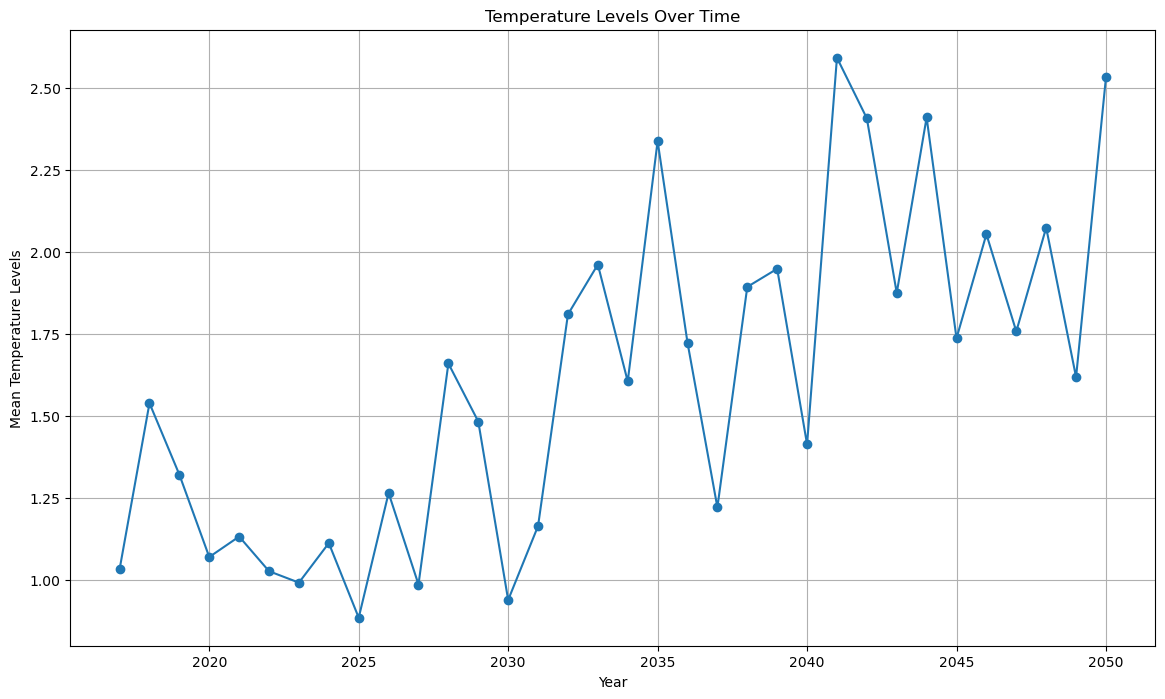

In [21]:
# Get the maximum temperature for each year
max_temps = modern_temp.groupby('modern_temperature_year')['modern_mean_temperature'].max()

# Calculate the average temperature increase 
avg_temp_increase = modern_temp['modern_mean_temperature'].mean()

# Generate up to 2050
future_years = list(range(modern_temp['modern_temperature_year'].max() + 1, modern_temp['modern_temperature_year'].max() + 35))  

# Predict temperatures for the next 100 years using mean and standard deviation
future_temps = [max_temps.iloc[-1] + i * avg_temp_increase + np.random.normal(loc=0, scale=modern_temp['modern_mean_temperature'].std()) for i in range(1, 35)]

# DataFrame for the future data
future_temperature = pd.DataFrame({'modern_temperature_year': future_years, 'modern_mean_temperature': future_temps})

mplot.figure(figsize=(14, 8))
mplot.plot(future_temperature['modern_temperature_year'], future_temperature['modern_mean_temperature'], marker='o', linestyle='-') 
mplot.xlabel('Year')
mplot.ylabel('Mean Temperature Levels')
mplot.title('Temperature Levels Over Time')
mplot.grid(True)
mplot.show()

We can see the temperature has risen by approx between 2 and 3 degrees since pre-anomoly increments increases. Let's see how that compares to existing future projection research.

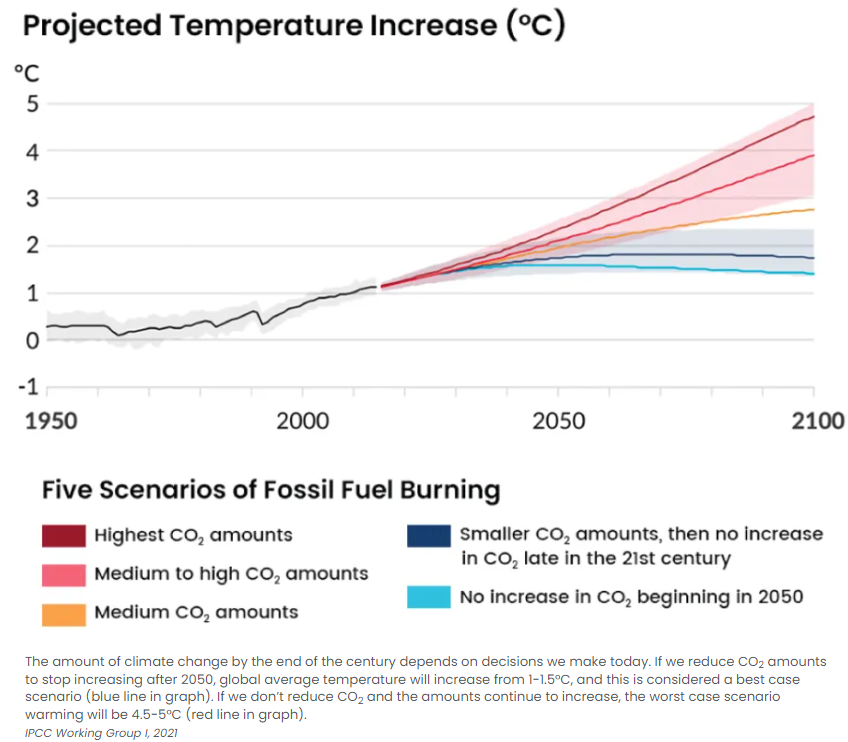

Here we see that in the year 2050, (depending on Co2 usage) the temperature likely to increase by between 2 and 3 degrees from pre-anomoly trends.

source : https://scied.ucar.edu/learning-zone/climate-change-impacts/predictions-future-global-climate 

Let's compare our analysis to other research.

Since 1880, there has been an increase of 1 degree and it is predicted to rise by about another 1.5 degrees by 2050. This is in line with our analysis showing a total of a 2-3 degree increment. 

source : https://dnr.wisconsin.gov/climatechange/science 


This projection can be further reinforced by research carried out here:  https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature 



In this study below, we can see that our projections seem accurate also if the scenario is RCP8.5.

RCP8.5 is a pathway where greenhouse gas emissions continue to grow unmitigated.

source : https://science2017.globalchange.gov/chapter/executive-summary/

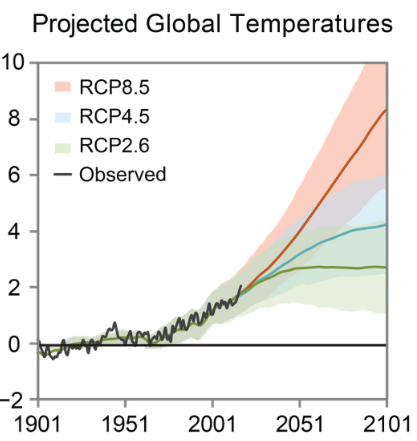